# Chapter 6, Example 2b

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn import datasets

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
no_epochs = 100

no_labels = 3
no_features = 4
no_exps = 10
no_folds = 3

hidden_units = [2, 4, 6, 8, 10, 12]

seed = 10
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
def train_exp(X, Y):

    acc = []
    for fold in range(no_folds):
        start, end = fold*50, (fold+1)*50
        x_test, y_test = X[start:end], Y[start:end]
        x_train  = np.append(X[:start], X[end:], axis=0)
        y_train = np.append(Y[:start], Y[end:], axis=0) 

        acc_ = []
        for no_hidden in hidden_units:
        
            model = Sequential([
                Dense(no_hidden, activation='relu'),
                Dense(no_labels, activation='softmax')])
    
            model.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
            history = model.fit(x_train, y_train,
                epochs=no_epochs,
                verbose=0,
                use_multiprocessing=False,
                validation_data=(x_test, y_test))
    
            acc_.append(history.history['val_accuracy'][no_epochs-1])
        
        acc.append(acc_)
    
    cv_acc = np.mean(np.array(acc), axis = 0)

    return cv_acc

In [4]:
# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

X = iris.data
Y = iris.target
no_data = len(iris.data)

acc = []
for exp in range(no_exps):
        
    idx = np.arange(no_data)
    np.random.shuffle(idx)

    acc.append(train_exp(X[idx], Y[idx]))
    print('exp %d, cv acc %s'%(exp, acc[exp]))

mean_acc = np.mean(np.array(acc), axis = 0)
print('accuracy %s'%(mean_acc))
print('* hidden units %d *'%hidden_units[np.argmax(mean_acc)])

exp 0, cv acc [0.73333335 0.76666665 0.78       0.85999995 0.84666663 0.85999995]
exp 1, cv acc [0.68       0.85999995 0.82       0.84666663 0.8333333  0.8666666 ]
exp 2, cv acc [0.67333335 0.6666667  0.8533333  0.8333333  0.76000005 0.8666666 ]
exp 3, cv acc [0.7        0.75333333 0.8733333  0.8733333  0.82666665 0.8333333 ]
exp 4, cv acc [0.6266667  0.76       0.78000003 0.82666665 0.9066667  0.88000005]
exp 5, cv acc [0.62       0.7933333  0.8333333  0.8866667  0.82       0.82666665]
exp 6, cv acc [0.54       0.74       0.82666665 0.8        0.79333335 0.8       ]
exp 7, cv acc [0.78000003 0.7066667  0.7866667  0.7866667  0.82666665 0.88000005]
exp 8, cv acc [0.72       0.75333333 0.87999994 0.8066667  0.84666663 0.82666665]
exp 9, cv acc [0.7133333  0.84       0.9066667  0.84       0.8533333  0.90000004]
accuracy [0.6786667  0.76400006 0.834      0.8360001  0.83133334 0.854     ]
* hidden units 12 *


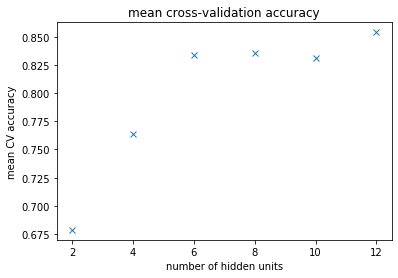

In [5]:
plt.figure(1)
plt.plot(hidden_units, mean_acc, marker = 'x', linestyle = 'None')
plt.title('mean cross-validation accuracy')
plt.xlabel('number of hidden units')
plt.ylabel('mean CV accuracy')
plt.savefig('./figures/6.2b_1.png')